In [3]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [4]:
# CSV 데이터를 데이터프레임으로 변환
df = pd.read_csv('Dementia_2022.csv', header=0, encoding='cp949')

In [5]:
# groupby를 사용한 데이터 그룹화
# (1) 근 3년간의 연령에 따른 전국 치매 유형별 환자 유병률
df1 = df.loc[:, ['시점', '행정구역(시도)별', '성별', '연령별', '치매환자유병률', 
                 '알츠하이머 환자유병률', '혈관성치매 환자유병률', '기타 환자유병률', '경도인지장애 환자유병률']]

# 특정 시군구가 아닌 전국 행태를 살펴보기 위해 필터링
mask = (df1['행정구역(시도)별'] == '전국') & (df1['성별'] == '전체')
df1 = df1[mask]
df1.drop(['행정구역(시도)별', '성별'], axis=1, inplace=True)

# 그룹화
year_age_group = df1.groupby(['시점', '연령별'])

In [6]:
# [mean] 근 3년간의 연령 및 유형별 평균 유병률(성별 구분 없음)
# 각 연도별로 같은 나이 범위의 행들을 합쳐 데이터프레임으로 반환하는 함수
def turn_mean(df, age):
    age_20 = year_age_group.get_group((2020, age))
    age_21 = year_age_group.get_group((2021, age))
    age_22 = year_age_group.get_group((2022, age))
    
    concat_m = pd.concat([age_20, age_21, age_22])
        
    return concat_m

# 나이별 평균을 저장할 데이터프레임 생성
df_means1 = pd.DataFrame(columns=df1.drop(['시점'], axis=1).columns)

# 나이별로 평균 계산 후 df_means1에 추가
for age in df1['연령별'].unique():
    tmp = turn_mean(df1, age)
    
    tmp.drop('시점', axis=1, inplace=True)
    age_mean = tmp.mean(numeric_only=True).to_frame()
    age_mean.loc['연령별'] = age
    age_mean = age_mean.T
    
    df_means1 = pd.concat([df_means1, age_mean])

df_means1.set_index('연령별', inplace=True)
print(df_means1) # 연령 및 치매 유형별 평균 출력(전체에 대한 치매환자유병률 포함)

          치매환자유병률 알츠하이머 환자유병률 혈관성치매 환자유병률  기타 환자유병률 경도인지장애 환자유병률
연령별                                                             
60~64세       0.61         0.0        0.61       0.0    14.943333
65~69세       1.39    1.296667         0.0      0.09    17.906667
70~74세       3.86         3.7        0.09      0.06        21.61
75~79세      11.81    4.916667    2.316667  4.566667    14.816667
80~84세  20.926667       16.33    0.773333  3.813333         47.8
85세이상   38.836667       33.85        3.25      1.72        22.31
60세이상    7.236667        5.35    0.796667  1.083333        20.27
65세이상   10.323333    7.843333    0.883333      1.59    22.746667


In [7]:
# (2) 근 3년간의 성별에 따른 전국 치매 유병률
df2 = df.loc[:, ['시점', '행정구역(시도)별', '성별', '연령별', '치매환자유병률', 
                 '알츠하이머 환자유병률', '혈관성치매 환자유병률', '기타 환자유병률', '경도인지장애 환자유병률']]

# 특정 시군구가 아닌 전국 행태를 살펴보기 위해 필터링, 남여 성별 기준이므로 전체 통계도 제외
mask = (df2['행정구역(시도)별'] == '전국') & (df2['성별'] != '전체')
df2 = df2[mask]
df2.drop(['행정구역(시도)별'], axis=1, inplace=True)

# 공통이 아닌 특정 행(60/65 이상, 남계, 여계에 따른 통계) 삭제
mask = (df2['연령별'] == '60~64세') | (df2['연령별'] == '65~69세') | \
    (df2['연령별'] == '70~74세') | (df2['연령별'] == '75~79세') | \
        (df2['연령별'] == '80~85세') | (df2['연령별'] == '85세이상')

df2 = df2.loc[mask]

# 그룹화
year_sex_group = df2.groupby(['시점', '성별'])

In [8]:
# [mean] 근 3년간의 성별에 따른 전국 평균 치매 유병률
# 각 연도별로 같은 나이 범위의 행들을 합쳐 데이터프레임으로 반환하는 함수
def turn_mean(df, sex):
    age_20 = year_sex_group.get_group((2020, sex))
    age_21 = year_sex_group.get_group((2021, sex))
    age_22 = year_sex_group.get_group((2022, sex))
    
    concat_m = pd.concat([age_20, age_21, age_22])
        
    return concat_m

# 성별에 따른 평균을 저장할 데이터프레임 생성
df_means2 = pd.DataFrame(columns=df2.drop(['시점', '연령별'], axis=1).columns)

for sex in df2['성별'].unique():
    sex_mean = turn_mean(df2, sex).drop('시점', axis=1)
    sex_mean = sex_mean.mean(numeric_only=True).to_frame()
    sex_mean = sex_mean.T
    sex_mean['성별'] = sex
    
    df_means2 = pd.concat([df_means2, sex_mean])

df_means2.set_index('성별', inplace=True)
print(df_means2) # 성별에 따른 평균 출력(전체에 대한 치매환자유병률 포함)

    치매환자유병률  알츠하이머 환자유병률  혈관성치매 환자유병률  기타 환자유병률  경도인지장애 환자유병률
성별                                                           
남    14.172    11.459333     2.274667  0.434000     17.417333
여    10.192     7.736667     0.644000  1.806667     18.560000


In [40]:
# [mean] 근 3년간의 성별 및 나이에 따른 전국 평균 치매 유병률
# 그룹화
year_sex_age_group = df2.groupby(['시점', '성별', '연령별'])

# 각 연도별로 같은 나이 범위의 행들을 합쳐 데이터프레임으로 반환하는 함수
def turn_mean(df, sex, age):
    
    age_20 = year_sex_age_group.get_group((2020, sex, age))
    age_21 = year_sex_age_group.get_group((2021, sex, age))
    age_22 = year_sex_age_group.get_group((2022, sex, age))
    
    concat_m = pd.concat([age_20, age_21, age_22])
        
    return concat_m

# 성별에 따른 평균을 저장할 데이터프레임 생성
df_means3 = pd.DataFrame(columns=df2.drop(['시점'], axis=1).columns)

for age in df2['연령별'].unique():
    for sex in df2['성별'].unique():
        sex_age_mean = turn_mean(df2, sex, age).drop('시점', axis=1)
        sex_age_mean = sex_age_mean.mean(numeric_only=True).to_frame()
        sex_age_mean = sex_age_mean.T
        sex_age_mean['성별'] = sex
        sex_age_mean['연령별'] = age
        
        df_means3 = pd.concat([df_means3, sex_age_mean])

df_means3.set_index('성별', inplace=True)
print(df_means3) # 성별에 따른 평균 출력(전체에 대한 치매환자유병률 포함)

       연령별  치매환자유병률  알츠하이머 환자유병률  혈관성치매 환자유병률  기타 환자유병률  경도인지장애 환자유병률
성별                                                                   
남   60~64세     1.13     0.000000     1.130000  0.000000     25.780000
여   60~64세     0.11     0.000000     0.110000  0.000000      4.386667
남   65~69세     1.85     1.656667     0.000000  0.190000      9.456667
여   65~69세     0.96     0.956667     0.000000  0.000000     25.790000
남   70~74세     4.66     4.450000     0.200000  0.000000     25.130000
여   70~74세     3.16     3.046667     0.000000  0.116667     18.516667
남   75~79세     9.23     2.970000     4.276667  1.980000      6.840000
여   75~79세    13.76     6.390000     0.830000  6.530000     20.856667
남    85세이상    53.99    48.220000     5.766667  0.000000     19.880000
여    85세이상    32.97    28.290000     2.280000  2.386667     23.250000


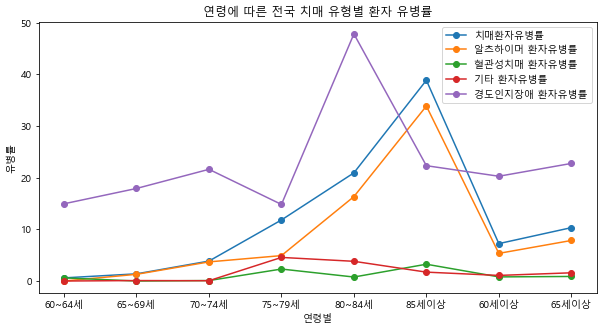

In [10]:
# matplotlib을 활용한 그래프 그리기
# (1) 연령에 따른 전국 치매 유형별 환자 유병률
plt.figure(figsize=(10, 5))
plt.plot(df_means1.index, df_means1.values, marker='o')

plt.title('연령에 따른 전국 치매 유형별 환자 유병률')
plt.xlabel('연령별')
plt.ylabel('유병률')

plt.legend(labels=df_means1.columns)

plt.show()

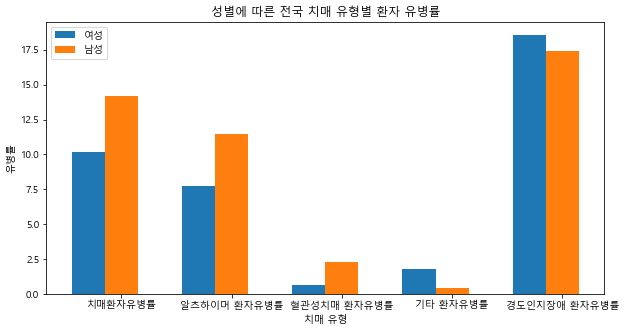

In [11]:
# (2) 성별에 따른 전국 치매 유형별 환자 유병률
import numpy as np

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

index = np.array(range(len(df_means3.연령별.unique())))
width = 0.3
female_data = df_means2.iloc[1]
male_data = df_means2.iloc[0]

plt.figure(figsize=(10, 5))

b1 = plt.bar(index, female_data, width)
index = index + width
b2 = plt.bar(index, male_data, width)

plt.title('성별에 따른 전국 치매 유형별 환자 유병률')
plt.xlabel('치매 유형')
plt.ylabel('유병률')

plt.legend([b1, b2], ['여성', '남성'])
plt.xticks(index, df_means2.columns)

plt.show()

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [86]:
# CSV 데이터를 데이터프레임으로 변환
df_patient = pd.read_csv('.\COVID-19 Dataset\Covid Data.csv', header=0, encoding='cp949')

In [ ]:
# 성별과 연령을 입력했을 시 입력된 해당 성별과 나잇대의 치매 발병률을 예측해주는 모델
# input; 여성(0), 남성(1)

# 데이터 전처리
df_ml = df_means3.reset_index()
df_ml['성별'] = df_ml['성별'].map({'여': 0, '남': 1})
df_ml['연령별'] = df_ml['연령별'].map({'60~64세': 60, '65~69세': 65, '70~74세': 70, '75~79세': 75, '85세이상': 85})
df_ml = df_ml.drop(['알츠하이머 환자유병률', '혈관성치매 환자유병률', '기타 환자유병률', '경도인지장애 환자유병률'], axis=1)
print(df_ml)

   성별  연령별  치매환자유병률  알츠하이머 환자유병률  혈관성치매 환자유병률  기타 환자유병률  경도인지장애 환자유병률
0   1   60     1.13     0.000000     1.130000  0.000000     25.780000
1   0   60     0.11     0.000000     0.110000  0.000000      4.386667
2   1   65     1.85     1.656667     0.000000  0.190000      9.456667
3   0   65     0.96     0.956667     0.000000  0.000000     25.790000
4   1   70     4.66     4.450000     0.200000  0.000000     25.130000
5   0   70     3.16     3.046667     0.000000  0.116667     18.516667
6   1   75     9.23     2.970000     4.276667  1.980000      6.840000
7   0   75    13.76     6.390000     0.830000  6.530000     20.856667
8   1   85    53.99    48.220000     5.766667  0.000000     19.880000
9   0   85    32.97    28.290000     2.280000  2.386667     23.250000


In [87]:
df_patient['치매환자유병률'] = 0

df_patient.drop(['USMER', 'MEDICAL_UNIT', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'], axis=1, inplace=True)

In [90]:
for n in range(df_patient.shape[0]):
    i = df_patient.loc[n, 'AGE']
    if(60<=i<65):
        # 60~64세 여성/남성
        if(df_patient.loc[n, 'SEX'] == 1):
            df_patient.loc[n, '치매환자유병률'] = df_ml.loc[0, '치매환자유병률']
        if(df_patient.loc[n, 'SEX'] == 2):
            df_patient.loc[n, '치매환자유병률'] = df_ml.loc[1, '치매환자유병률']
    elif(65<=i<70):
        # 65~69세 여성/남성
        if(df_patient.loc[n, 'SEX'] == 1):
            df_patient.loc[n, '치매환자유병률'] = df_ml.loc[0, '치매환자유병률']
        if(df_patient.loc[n, 'SEX'] == 2):
            df_patient.loc[n, '치매환자유병률'] = df_ml.loc[1, '치매환자유병률']
    elif(70<=i<75):
        # 70~74세 여성/남성
        if(df_patient.loc[n, 'SEX'] == 1):
            df_patient.loc[n, '치매환자유병률'] = df_ml.loc[0, '치매환자유병률']
        if(df_patient.loc[n, 'SEX'] == 2):
            df_patient.loc[n, '치매환자유병률'] = df_ml.loc[1, '치매환자유병률']
    elif(75<=i<80):
        # 75~79세 여성/남성
        if(df_patient.loc[n, 'SEX'] == 1):
            df_patient.loc[n, '치매환자유병률'] = df_ml.loc[0, '치매환자유병률']
        if(df_patient.loc[n, 'SEX'] == 2):
            df_patient.loc[n, '치매환자유병률'] = df_ml.loc[1, '치매환자유병률']
    elif(85<=i):
        if(df_patient.loc[n, 'SEX'] == 1):
            df_patient.loc[n, '치매환자유병률'] = df_ml.loc[0, '치매환자유병률']
        if(df_patient.loc[n, 'SEX'] == 2):
            df_patient.loc[n, '치매환자유병률'] = df_ml.loc[1, '치매환자유병률']
    else:
        df_patient.loc[n, '치매환자유병률'] = np.nan

In [91]:
print(df_patient.head())

   SEX  AGE  치매환자유병률
0    1   65     1.13
1    2   72     0.11
2    2   55      NaN
3    1   53      NaN
4    2   68     0.11


In [113]:
df_patient.dropna(axis=0, inplace=True)

In [102]:
scaler=StandardScaler()

In [103]:
df_patient.columns

Index(['SEX', 'AGE', '치매환자유병률'], dtype='object')

In [114]:
x = df_patient.drop(['치매환자유병률'], axis=1)
x = scaler.fit_transform(x)

In [115]:
y = df_patient['치매환자유병률']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [122]:
lm = LogisticRegression()

In [123]:
lm.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [ ]:
y_predictions=lm.predict(X_test)